
# Análise de Dados - Olist

Este notebook apresenta uma análise detalhada dos dados da plataforma Olist. O objetivo é identificar tendências, desafios e oportunidades para melhorar a performance de vendas, logística e satisfação dos clientes.

---

## **Sumário**
1. [Carregamento de dados](#Carregamento-de-dados)
2. [Limpeza e Tratamento dos Dados](#Limpeza-e-Tratamento-dos-Dados)
3. [Análise Exploratória de Dados (EDA)](#Análise-Exploratória-de-Dados)
---


## **1. Carregamento dos Dados**

Para iniciar, carregamos os arquivos principais do dataset do Olist. Isso inclui informações sobre clientes, pedidos, vendedores, produtos e outros. A pré-visualização dos dados permite entender a estrutura e os campos disponíveis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 55)

caminhos = {
    "clientes": "dados/olist_customers_dataset.csv",
    "geolocalizacao": "dados/olist_geolocation_dataset.csv",
    "itens_pedidos": "dados/olist_order_items_dataset.csv",
    "pagamentos_pedidos": "dados/olist_order_payments_dataset.csv",
    "avaliacoes_pedidos": "dados/olist_order_reviews_dataset.csv",
    "pedidos": "dados/olist_orders_dataset.csv",
    "produtos": "dados/olist_products_dataset.csv",
    "vendedores": "dados/olist_sellers_dataset.csv",
    "traducao_categorias": "dados/product_category_name_translation.csv",
}

dataframes = {nome: pd.read_csv(caminho) for nome, caminho in caminhos.items()}

clientes_df = dataframes["clientes"]
geolocalizacao_df = dataframes["geolocalizacao"]
itens_pedidos_df = dataframes["itens_pedidos"]
pagamentos_pedidos_df = dataframes["pagamentos_pedidos"]
avaliacoes_pedidos_df = dataframes["avaliacoes_pedidos"]
pedidos_df = dataframes["pedidos"]
produtos_df = dataframes["produtos"]
vendedores_df = dataframes["vendedores"]
traducao_categorias_df = dataframes["traducao_categorias"]

### 1.1 Pré-visualização dos Dados

Exibimos uma amostra de cada DataFrame para entender sua estrutura e conteúdo.

In [2]:
clientes_df.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
79977,fbd922e9f5bf7801d5158eca21b27c26,e292ce879d657c57ba04028dda21fba9,48905,juazeiro,BA
78091,8b038505df5bde7b6eb148d0d3bd7f57,6c8e1824617c6e2088b5f802b768843a,30150,belo horizonte,MG


In [3]:
geolocalizacao_df.sample(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
910622,88317,-26.877886,-48.749516,itajaí,SC
863661,83408,-25.365162,-49.175093,colombo,PR


In [4]:
itens_pedidos_df.sample(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
69133,9de2a2221c70367c014ab770286b3c31,1,d8341864896312c9316d79675ade4d1b,3c4e0452bff7a2a788179488d3d77032,2018-01-12 19:27:57,49.90,9.09
18191,29baa2288a6c833c165b32b46e4ffcce,1,1f5f0f003ce8595ad88fb215ec1409e6,8d956fec2e4337affcb520f56fd8cbfd,2018-03-21 09:29:37,99.95,23.00


In [5]:
pagamentos_pedidos_df.sample(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
84898,157cdf5ef06664d53e7449d529e2bad1,1,voucher,1,49.33
48942,91750e4d3d89e619cd557a6da400be06,3,voucher,1,10.42


In [6]:
avaliacoes_pedidos_df.sample(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
54889,ce4ac1615f6461304e5227241c84199a,d1841aabfefc61ddc63d1113e5f766e8,5,NaN,NaN,2018-06-13 00:00:00,2018-06-14 00:29:36
1145,04be91807ee519b0431bc3bdffbba030,51df4b64807ba1804510ee0c17f1e074,1,NaN,NaN,2017-07-20 00:00:00,2017-07-20 12:45:45


In [7]:
pedidos_df.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
31049,c9d46caad10d4c85f1eded254193e2a5,84fe777cc65bf2b45cfaa88b6c1188e7,delivered,2017-12-12 17:14:09,2017-12-12 17:31:50,2017-12-13 23:52:38,2018-01-12 21:53:40,2018-01-11 00:00:00
60456,be74db37c6be2764570dc81e103dc60b,35e459cd733a3cb6d98f593fcc9d67db,delivered,2018-01-29 06:24:06,2018-01-29 07:08:57,2018-01-29 23:34:40,2018-02-05 19:56:54,2018-02-20 00:00:00


In [8]:
produtos_df.sample(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1036,18047039004204f52054f74b9503b9fe,cama_mesa_banho,41.0,384.0,1.0,2555.0,55.0,17.0,48.0
32643,a4385c12734e0937f4514a3cde277925,relogios_presentes,49.0,598.0,2.0,467.0,17.0,10.0,12.0


In [9]:
vendedores_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1283,6824a69c9ea0313eba299dd4a2dba09a,35570,formiga,MG
3019,eb3071b9f0b0ddaa2df5ea130f09f26b,4281,sao paulo,SP
492,c4fabeea6e569d42d02993bb1f4f1cbc,60741,fortaleza,CE
3077,747e73c01a4593d4cf60dcf970fd2689,55602,vitoria de santo antao,PE
1021,b55638ad525e906c698fa2ce742c1742,88780,imbituba,SC


In [10]:
traducao_categorias_df.sample(2)

,product_category_name,product_category_name_english
40,casa_construcao,home_construction
25,construcao_ferramentas_construcao,construction_tools_construction


In [11]:
produtos_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### 1.2 Identificação de valores ausentes

Identificamos valores ausentes em cada coluna dos DataFrames e organizamos os resultados em uma tabela consolidada para melhor visualização.

In [12]:
resumo = []

for nome, df in dataframes.items():
    valores_ausentes = df.isnull().sum() 
    df_resumo = pd.DataFrame({
        "DataFrame": [nome] * len(valores_ausentes),
        "Coluna": valores_ausentes.index,
        "Valores ausentes": valores_ausentes.values
    })
    resumo.append(df_resumo)
    
df_resumo_final = pd.concat(resumo, ignore_index=True)
df_resumo_final


,DataFrame,Coluna,Valores ausentes
0,clientes,customer_id,0
1,clientes,customer_unique_id,0
2,clientes,customer_zip_code_prefix,0
3,clientes,customer_city,0
4,clientes,customer_state,0
5,geolocalizacao,geolocation_zip_code_prefix,0
6,geolocalizacao,geolocation_lat,0
7,geolocalizacao,geolocation_lng,0
8,geolocalizacao,geolocation_city,0
9,geolocalizacao,geolocation_state,0


## **2. Limpeza e Tratamento dos Dados**
Antes de realizar análises mais aprofundadas, é essencial tratar dados ausentes e inconsistências. Nesta etapa:
- Comentários e títulos ausentes nas avaliações foram preenchidos com valores padrão.
- Valores numéricos ausentes (como dimensões de produtos) foram preenchidos com a média.

In [13]:

avaliacoes_pedidos_df['review_comment_message'] = avaliacoes_pedidos_df['review_comment_message'].fillna('Sem Comentário')
avaliacoes_pedidos_df['review_comment_title'] = avaliacoes_pedidos_df['review_comment_title'].fillna('Sem Título')

colunas_numericas = [
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]
produtos_df[colunas_numericas] = produtos_df[colunas_numericas].apply(lambda col: col.fillna(col.mean()))

produtos_df.isnull().sum()


product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

## **3. Análise Exploratória de Dados (EDA)**

Exploramos os dados disponíveis para identificar tendências, padrões e insights relevantes. A análise abrange diferentes aspectos da plataforma Olist, como categorias de produtos, métodos de pagamento e outros. Essas informações ajudam a compreender o comportamento dos clientes, desempenho de vendas e possíveis áreas de melhoria.


### 3.1 Top 10 Categorias Mais Vendidas

In [14]:
produtos_df = produtos_df.merge(traducao_categorias_df, on='product_category_name', how='left')

top_categorias = (
    itens_pedidos_df.merge(produtos_df, on='product_id')
    .groupby('product_category_name_english')['order_id']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'order_id': 'Quantidade de Pedidos', 'product_category_name_english': 'Categoria'})
    .head(10)
)
top_categorias

,Categoria,Quantidade de Pedidos
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


### 3.2 Métodos de Pagamento Mais Utilizados

In [15]:
metodos_pagamento = (
    pagamentos_pedidos_df.groupby('payment_type')['payment_value']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'payment_type': 'Método de Pagamento', 'payment_value': 'Total Pago (R$)'})
)
metodos_pagamento

,Método de Pagamento,Total Pago (R$)
0,credit_card,12542084.19
1,boleto,2869361.27
2,voucher,379436.87
3,debit_card,217989.79
4,not_defined,0.00


### 3.3 Tempo médio de entrega em cada estado

In [16]:
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'], errors='coerce')

pedidos_df['Tempo de Entrega (dias)'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_purchase_timestamp']).dt.days

pedidos_df['atraso_entrega'] = pedidos_df['order_delivered_customer_date'] > pedidos_df['order_estimated_delivery_date']

clientes_com_entrega = clientes_df.merge(pedidos_df, on='customer_id')
media_entrega_por_estado = (
    clientes_com_entrega.groupby('customer_state')['Tempo de Entrega (dias)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'customer_state': 'Estado', 'Tempo de Entrega (dias)': 'Média de Entrega (dias)'})
    .round(2)
)

media_entrega_por_estado

,Estado,Média de Entrega (dias)
0,RR,28.98
1,AP,26.73
2,AM,25.99
3,AL,24.04
4,PA,23.32
5,MA,21.12
6,SE,21.03
7,CE,20.82
8,AC,20.64
9,PB,19.95


### 3.4 Receita por Estado

In [17]:
pedidos_pagamentos = pedidos_df.merge(pagamentos_pedidos_df, on="order_id")

clientes_pedidos_pagamentos = pedidos_pagamentos.merge(clientes_df, on="customer_id")

receita_por_estado = (
    clientes_pedidos_pagamentos.groupby("customer_state")["payment_value"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"customer_state": "Estado", "payment_value": "Total de Receita (R$)"})
    .head(10)
)
receita_por_estado


,Estado,Total de Receita (R$)
0,SP,5998226.96
1,RJ,2144379.69
2,MG,1872257.26
3,RS,890898.54
4,PR,811156.38
5,SC,623086.43
6,BA,616645.82
7,DF,355141.08
8,GO,350092.31
9,ES,325967.55


### 3.5 Estados com maior percentual de atrasos

In [18]:
atrasos_por_estado = (
    clientes_pedidos_pagamentos.groupby('customer_state')
    .agg(
        total_pedidos=('order_id', 'count'),
        total_atrasos=('atraso_entrega', 'sum')
    )
    .reset_index()
)

atrasos_por_estado['percentual_atraso'] = (
    atrasos_por_estado['total_atrasos'] / atrasos_por_estado['total_pedidos']
)

atrasos_por_estado = atrasos_por_estado.rename(
    columns={
        'customer_state': 'Estado',
        'total_pedidos': 'Total de Pedidos',
        'total_atrasos': 'Total de Atrasos',
        'percentual_atraso': 'Percentual de Atrasos (%)'
    }
)

estados_com_mais_atrasos = atrasos_por_estado.sort_values(by='Percentual de Atrasos (%)', ascending=False).head(10)
estados_com_mais_atrasos


,Estado,Total de Pedidos,Total de Atrasos,Percentual de Atrasos (%)
1,AL,427,100,0.234192
9,MA,767,144,0.187744
16,PI,524,83,0.158397
5,CE,1398,203,0.145207
24,SE,361,51,0.141274
4,BA,3610,490,0.135734
18,RJ,13527,1751,0.129445
13,PA,1011,121,0.119683
7,ES,2107,251,0.119127
19,RN,522,62,0.118774


## **4. Análise dos gráficos gerados a partir da EDA**

Fizemos uma representação simples de cada gráfico para maior entendimento. Tivemos a liberdade de traduzir alguns segmentos para melhor compreensão dos gráficos

### 4.1 Top 10 categorias mais vendidas

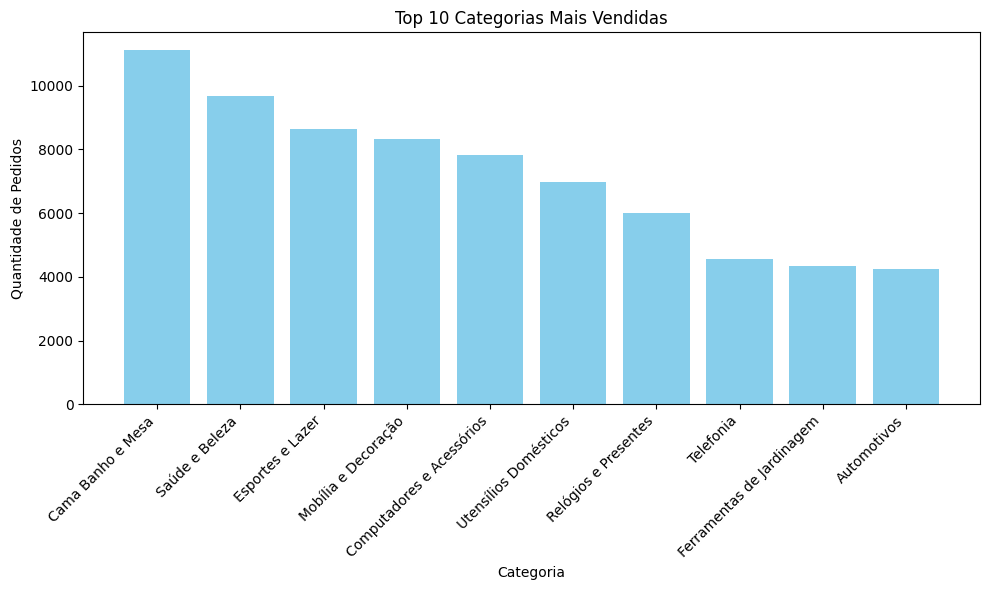

In [19]:
top_categorias['Categoria'] = top_categorias['Categoria'].map({
    'health_beauty': 'Saúde e Beleza',
    'furniture_decor': 'Mobília e Decoração',
    'auto': 'Automotivos',
    'housewares': 'Utensílios Domésticos',
    'sports_leisure': 'Esportes e Lazer',
    'computers_accessories': 'Computadores e Acessórios',
    'telephony': 'Telefonia',
    'garden_tools': 'Ferramentas de Jardinagem',
    'bed_bath_table': 'Cama Banho e Mesa',
    'watches_gifts': 'Relógios e Presentes'
}).fillna(top_categorias['Categoria'])

plt.figure(figsize=(10, 6))
plt.bar(top_categorias['Categoria'], top_categorias['Quantidade de Pedidos'], color='skyblue')
plt.title('Top 10 Categorias Mais Vendidas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.2 Métodos de pagamento mais utilizados

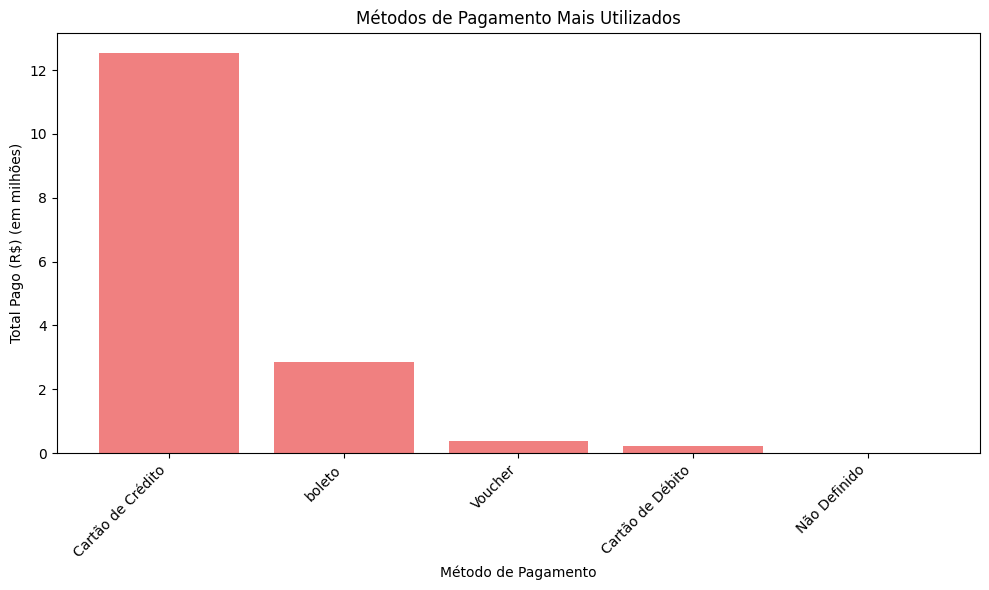

In [20]:
metodos_pagamento['Método de Pagamento'] = metodos_pagamento['Método de Pagamento'].replace({
    'credit_card': 'Cartão de Crédito',
    'voucher': 'Voucher',
    'debit_card': 'Cartão de Débito',
    'billet': 'Boleto',
    'not_defined': 'Não Definido'
})

plt.figure(figsize=(10, 6))
plt.bar(metodos_pagamento['Método de Pagamento'], metodos_pagamento['Total Pago (R$)'] / 1e6, color='lightcoral')
plt.title('Métodos de Pagamento Mais Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Total Pago (R$) (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.3 Tempo médio de entrega em cada estado

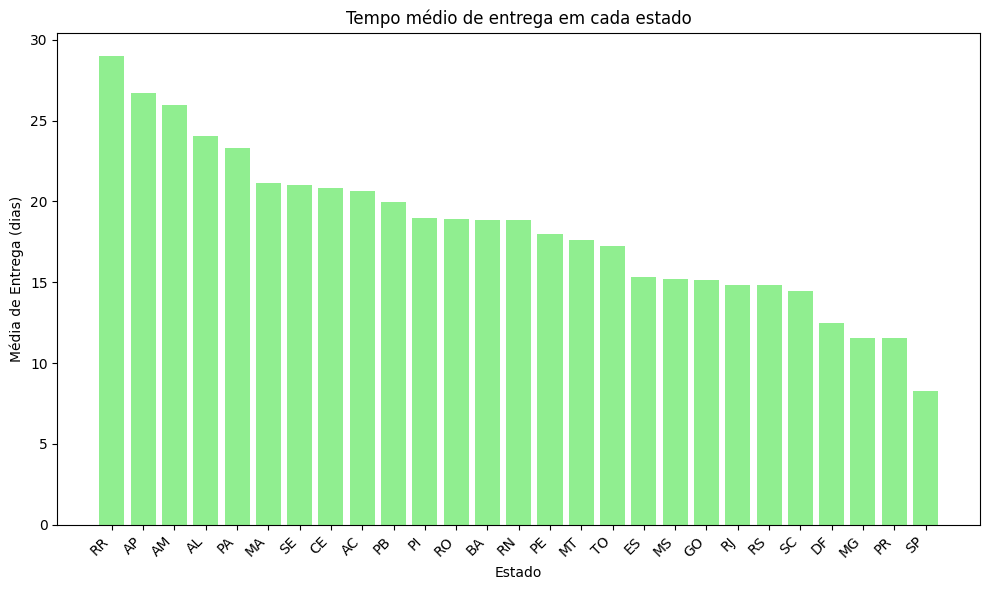

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(media_entrega_por_estado['Estado'], media_entrega_por_estado['Média de Entrega (dias)'], color='lightgreen')
plt.title('Tempo médio de entrega em cada estado')
plt.xlabel('Estado')
plt.ylabel('Média de Entrega (dias)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.4 Receita por Estado

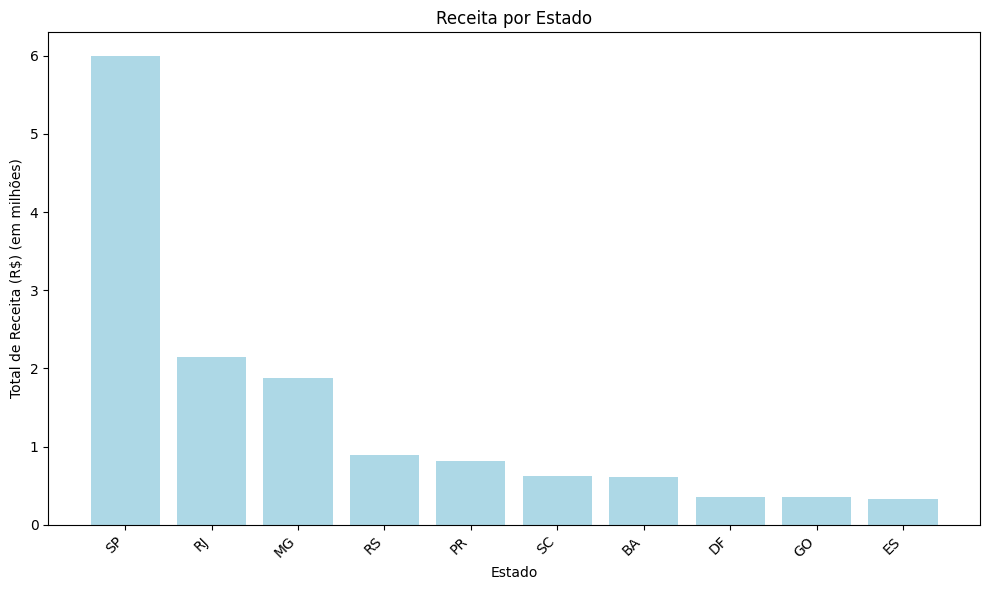

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(receita_por_estado['Estado'], receita_por_estado['Total de Receita (R$)'] / 1e6, color='lightblue')
plt.title('Receita por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Receita (R$) (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.5 Estados com maior percentual de atraso

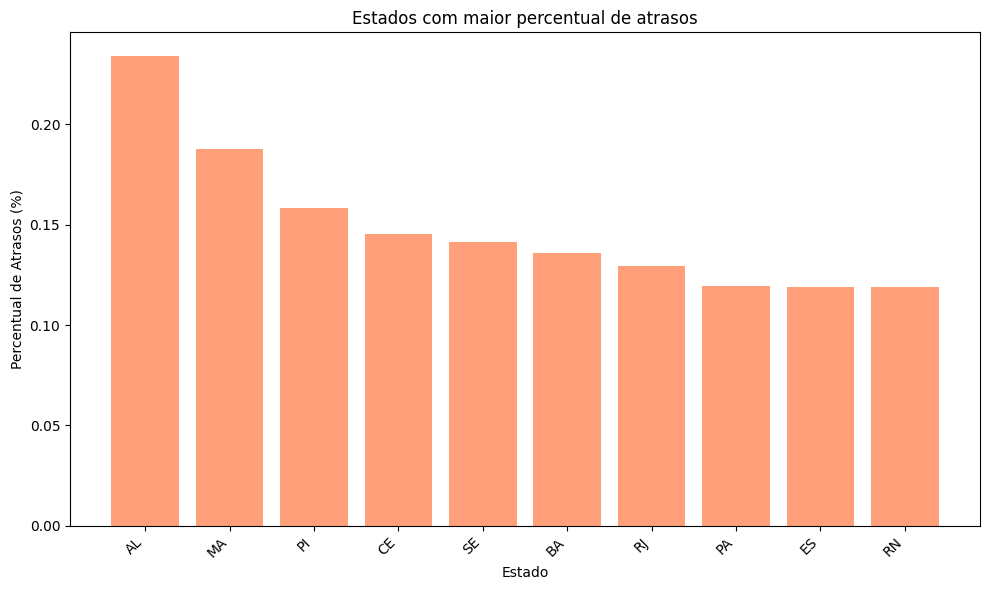

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(estados_com_mais_atrasos['Estado'], estados_com_mais_atrasos['Percentual de Atrasos (%)'], color='lightsalmon')
plt.title('Estados com maior percentual de atrasos')
plt.xlabel('Estado')
plt.ylabel('Percentual de Atrasos (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()